In [1]:
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import ast
from scipy.stats import ttest_ind
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/jjccyy9741/OneDrive - postech.ac.kr/바탕 화면/final_seq_data.csv')
print(data.shape)

C:\Users\jjccyy9741\AppData\Local\Temp\ipykernel_10528\3009508787.py:1: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,32,36,45,60,61,62,63,64,65,66,67,68,69,71) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/jjccyy9741/OneDrive - postech.ac.kr/바탕 화면/final_seq_data.csv')


(13522573, 72)


In [3]:
# 'REPAIR_START_DATE' 및 'REPAIR_END_DATE'를 datetime 형식으로 변환
data['REPAIR_START_DATE'] = pd.to_datetime(data['REPAIR_START_DATE'], format='%Y%m%d')
data['REPAIR_END_DATE'] = pd.to_datetime(data['REPAIR_END_DATE'], format='%Y%m%d')

# 'REPAIR_PERIOD' 컬럼 추가
data['REPAIR_PERIOD'] = (data['REPAIR_END_DATE'] - data['REPAIR_START_DATE']).dt.days

In [4]:
df = data.copy()

In [18]:
df.shape

(13522573, 73)

In [5]:
reserv_df = df[df['RECLAIM']==1]

# 미국 인도 비교

In [6]:
print('df size:',df.shape)
print('reserv_df size:',reserv_df.shape)

df size: (13522573, 73)
reserv_df size: (394736, 73)


In [7]:
usa_df = reserv_df[reserv_df['SUBSIDIARY_NAME'] == 'LGEAI']
india_df = reserv_df[reserv_df['SUBSIDIARY_NAME'] == 'LGEIL']

## 재서비스율 비교

In [8]:
print('미국 재서비스율')
print(len(usa_df)/len(df[df['SUBSIDIARY_NAME']=='LGEAI']))

print('인도 재서비스율')
print(len(india_df)/len(df[df['SUBSIDIARY_NAME']=='LGEIL']))

미국 재서비스율
0.07904631856007757
인도 재서비스율
0.025163997048264927


## 수리기간 비교

In [9]:

display(usa_df['REPAIR_PERIOD'].describe())
print('********************************************')

display(india_df['REPAIR_PERIOD'].describe())

count    79885.000000
mean         3.441184
std         10.758878
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        300.000000
Name: REPAIR_PERIOD, dtype: float64

********************************************


count    314851.000000
mean          0.226228
std           1.730407
min         -20.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         135.000000
Name: REPAIR_PERIOD, dtype: float64

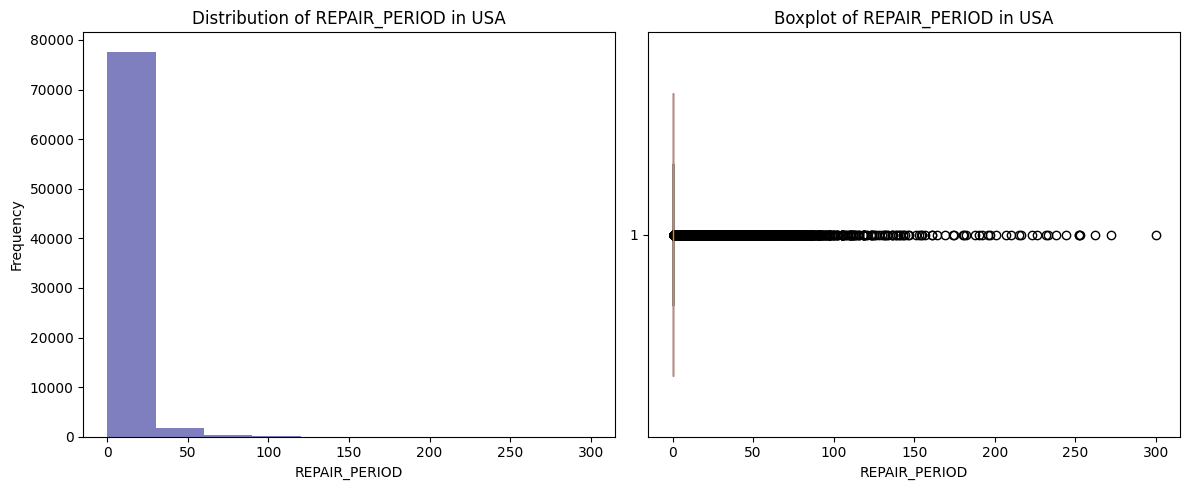

In [10]:
# Figure 및 Axes 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 첫 번째 서브플롯: 히스토그램
axes[0].hist(usa_df['REPAIR_PERIOD'], bins=10, alpha=0.5, color='navy')
axes[0].set_title('Distribution of REPAIR_PERIOD in USA')
axes[0].set_xlabel('REPAIR_PERIOD')
axes[0].set_ylabel('Frequency')

# 두 번째 서브플롯: 박스플롯
axes[1].boxplot(usa_df['REPAIR_PERIOD'], vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='navy', color='navy'))
axes[1].set_title('Boxplot of REPAIR_PERIOD in USA')
axes[1].set_xlabel('REPAIR_PERIOD')

# 서브플롯 간의 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()

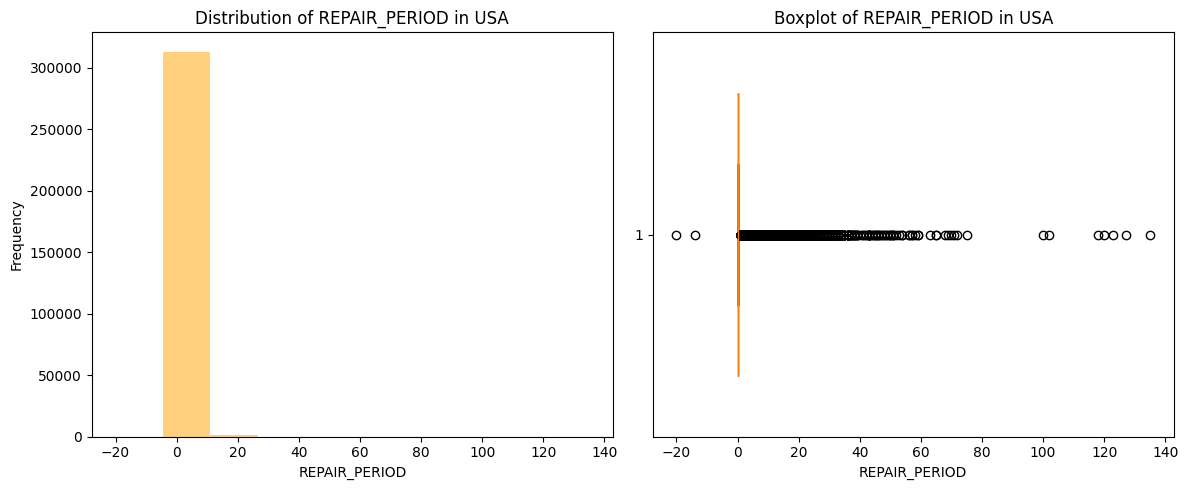

In [11]:
# Figure 및 Axes 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 첫 번째 서브플롯: 히스토그램
axes[0].hist(india_df['REPAIR_PERIOD'], bins=10, alpha=0.5, color='orange')
axes[0].set_title('Distribution of REPAIR_PERIOD in USA')
axes[0].set_xlabel('REPAIR_PERIOD')
axes[0].set_ylabel('Frequency')

# 두 번째 서브플롯: 박스플롯
axes[1].boxplot(india_df['REPAIR_PERIOD'], vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='blue', color='blue'))
axes[1].set_title('Boxplot of REPAIR_PERIOD in USA')
axes[1].set_xlabel('REPAIR_PERIOD')

# 서브플롯 간의 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()

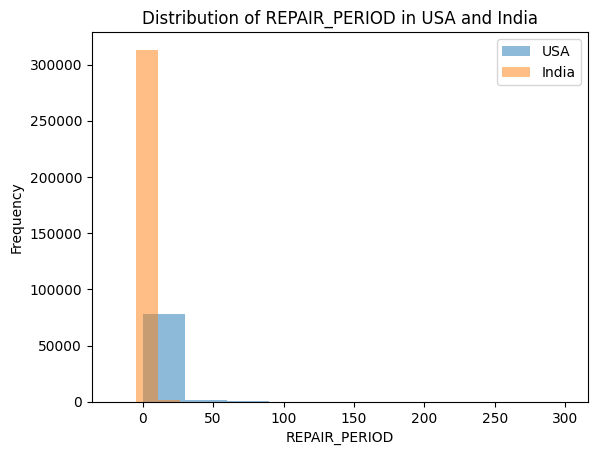

In [12]:
# 히스토그램 그리기
plt.hist(usa_df['REPAIR_PERIOD'], bins=10, alpha=0.5, label='USA')
plt.hist(india_df['REPAIR_PERIOD'], bins=10, alpha=0.5, label='India')

# 그래프 제목 및 레이블 설정
plt.title('Distribution of REPAIR_PERIOD in USA and India')
plt.xlabel('REPAIR_PERIOD')
plt.ylabel('Frequency')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()

## 재서비스 기간(이전 서비스와 재서비스 접수 사이의 기간) 비교

In [13]:
display(usa_df['RECLAIM_PERIOD'].describe())
print('미국')
print('***********')
print('인도')
display(india_df['RECLAIM_PERIOD'].describe())

count    79885.000000
mean        23.569907
std         26.831583
min        -89.000000
25%          5.000000
50%         15.000000
75%         40.000000
max         89.000000
Name: RECLAIM_PERIOD, dtype: float64

미국
***********
인도


count    314851.000000
mean         34.538391
std          29.062193
min         -89.000000
25%          10.000000
50%          32.000000
75%          58.000000
max          89.000000
Name: RECLAIM_PERIOD, dtype: float64

In [14]:
print(len(usa_df['ENGINEER_REPAIR'].value_counts()))
usa_df['ENGINEER_REPAIR'].value_counts()

79


ENGINEER_REPAIR
Sealed System Repair                20250
Part replaced-mechanical (ref#)     19472
Part replaced-electrical (ref#)     14100
Customer education                   5802
Adjustment  internal (give ref#)     4099
                                    ...  
MSD base replacement                    1
HDMI no audio                           1
BDU replacement                         1
Pipe ass'y Inlet replacement            1
VITM replacement                        1
Name: count, Length: 79, dtype: int64

In [15]:
print(len(india_df['ENGINEER_REPAIR'].value_counts()))
india_df['ENGINEER_REPAIR'].value_counts()

42


ENGINEER_REPAIR
Parts replaced                                   117866
Installation of new product                       46905
Demo given                                        27754
Gas Charging                                      19458
Internal adjustment                               14107
Compressor Replaced                               12776
Wet/Preventive Maintenance                        11461
External adjustment                               11099
Module/Array/Open Cell Replacement                 9736
DRY SERVICE                                        9552
Set Found OK                                       6200
Explanation Done                                   5985
Clean set internally                               4391
Clean Filter                                       3505
O/W Estimate given                                 3231
Re-Installation                                    3038
Accessory Sale                                     2776
Drum Replacement                

In [16]:
print(len(usa_df['RECEIPT_SYMPTOM'].value_counts()))
usa_df['RECEIPT_SYMPTOM'].value_counts()

127


RECEIPT_SYMPTOM
Cooling                                 20273
FIX                                      5968
Icemaker                                 5773
Noise                                    4633
Leaking                                  3460
                                        ...  
Troubleshooting - Network Connection        1
(PCC)Error/Display                          1
(PCC)Water Supply                           1
(PCC)Drying                                 1
Inquiry                                     1
Name: count, Length: 127, dtype: int64

In [17]:
print(len(india_df['RECEIPT_SYMPTOM'].value_counts()))
india_df['RECEIPT_SYMPTOM'].value_counts()

151


RECEIPT_SYMPTOM
Power Issues                         48475
Specification                        42946
Cooling Issues                       32971
How to: Installation and Settings    29024
TS: Temperature                      16994
                                     ...  
Video/Audio Recording                    1
TS: Dispenser Issues                     1
Display                                  1
Dust Tank Issues                         1
Miscellaneous                            1
Name: count, Length: 151, dtype: int64